In [1]:
# importing important libraries
import matplotlib as plt
%matplotlib inline
import numpy as np
from sklearn import mixture
import pandas as pd
import seaborn as sns

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Reading in the Data

In [3]:
pass_attempt_df = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/safeties_pass_attempts_man_zone_gmm_features.csv")
pass_attempt_df.shape

(34350, 157)

In [4]:
sacks_df = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/safeties_sacks_man_zone_gmm_features.csv")
sacks_df.shape

(2496, 98)

In [5]:
# printing the number of weeks of data available
np.unique(pass_attempt_df['week'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

# Clustering Pass Attempt Coverage

In [7]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'var_x_time_0', 'var_x_time_0_1', 'var_x_time_1', 'var_x_time_1_2',
       ...
       'best_cor_y_time_0', 'best_cor_y_time_0_1', 'best_cor_y_time_1',
       'best_cor_y_time_1_2', 'best_cor_y_time_2', 'best_cor_x_y_avg_time_0',
       'best_cor_x_y_avg_time_0_1', 'best_cor_x_y_avg_time_1',
       'best_cor_x_y_avg_time_1_2', 'best_cor_x_y_avg_time_2'],
      dtype='object', length=157)

In [8]:
pass_attempt_df.head(10)

,week,gameId,playId,nflId,displayName,position,var_x_time_0,var_x_time_0_1,var_x_time_1,var_x_time_1_2,...,best_cor_y_time_0,best_cor_y_time_0_1,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_y_time_2,best_cor_x_y_avg_time_0,best_cor_x_y_avg_time_0_1,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,best_cor_x_y_avg_time_2
0,1,2018090600,75,79848,Malcolm Jenkins,SS,0.000040,1.166744,1.381777,5.612926,...,0.301511,0.917693,0.932557,0.967925,0.986645,0.150756,0.940998,0.947474,0.977409,0.992447
1,1,2018090600,75,2495613,Corey Graham,FS,0.002623,0.101000,0.087121,1.271656,...,0.446596,0.427578,0.969825,0.988005,0.893565,0.223298,0.491547,0.487907,0.888162,0.940889
2,1,2018090600,75,2534832,Rodney McLeod,FS,0.000117,1.428437,1.601692,3.067787,...,0.763763,0.869607,0.909540,0.985349,0.999951,0.381881,0.930229,0.949713,0.987079,0.994205
3,1,2018090600,146,79848,Malcolm Jenkins,SS,0.028806,0.031856,0.007075,0.136913,...,0.670661,0.992019,0.996112,0.995376,0.999138,0.780591,0.407083,0.805154,0.913364,0.999173
4,1,2018090600,146,2534832,Rodney McLeod,FS,0.001173,0.110424,0.113656,0.108629,...,0.666667,0.993856,0.996690,0.997926,0.996815,0.333333,0.991989,0.994843,0.894573,0.498407
5,1,2018090600,168,79848,Malcolm Jenkins,SS,0.028468,1.218216,1.159298,4.019429,...,0.166667,0.997760,0.997523,0.816806,0.972542,0.578936,0.991354,0.992313,0.907166,0.967231
6,1,2018090600,168,2534832,Rodney McLeod,FS,0.000388,0.000863,0.000927,0.871543,...,0.500000,0.864665,0.871272,0.970323,0.990507,0.627923,0.757865,0.749660,0.848212,0.903267
7,1,2018090600,190,79848,Malcolm Jenkins,SS,0.121334,5.880573,3.830211,5.781740,...,0.933806,0.213127,0.657844,0.856207,0.938802,0.956959,0.588050,0.822593,0.838513,0.092874
8,1,2018090600,190,2495613,Corey Graham,FS,0.109521,6.105973,4.689615,13.428011,...,0.591108,0.529000,0.514270,0.942824,0.999663,0.519904,0.753627,0.752364,0.970513,0.999066
9,1,2018090600,190,2534832,Rodney McLeod,FS,0.048204,0.108611,0.125185,0.390225,...,0.606070,0.998051,0.998073,0.950927,0.990505,0.116384,0.906997,0.949323,0.769886,0.835551


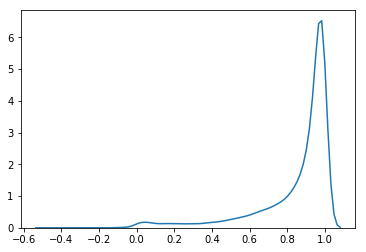

In [9]:
sns.kdeplot(data=np.array(pass_attempt_df["best_cor_x_y_avg_time_1_2"]))

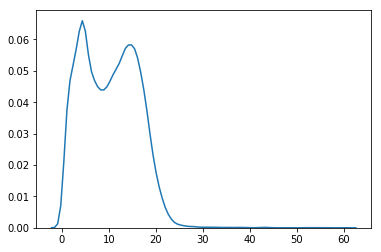

In [10]:
sns.kdeplot(data=np.array(pass_attempt_df["off_mean_between_ball_snap_and_pass_forward"]))

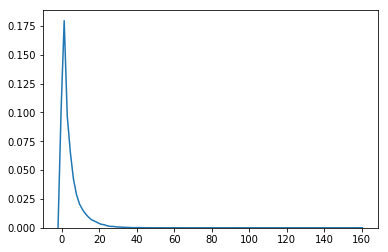

In [11]:
sns.kdeplot(data=np.array(pass_attempt_df["ratio_pass_forward"]))

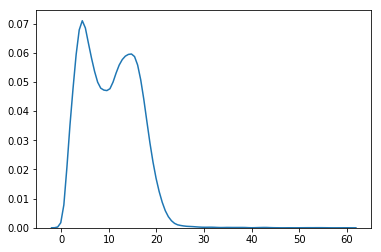

In [12]:
sns.kdeplot(data=np.array(pass_attempt_df["off_mean_time_1"]))

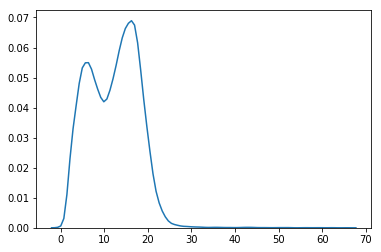

In [13]:
sns.kdeplot(data=np.array(pass_attempt_df["cb_off_dist_ball_snap"]))

In [14]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'var_x_time_0', 'var_x_time_0_1', 'var_x_time_1', 'var_x_time_1_2',
       ...
       'best_cor_y_time_0', 'best_cor_y_time_0_1', 'best_cor_y_time_1',
       'best_cor_y_time_1_2', 'best_cor_y_time_2', 'best_cor_x_y_avg_time_0',
       'best_cor_x_y_avg_time_0_1', 'best_cor_x_y_avg_time_1',
       'best_cor_x_y_avg_time_1_2', 'best_cor_x_y_avg_time_2'],
      dtype='object', length=157)

In [15]:
pass_attempt_df = pass_attempt_df[['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
                                  'best_cor_x_y_avg_time_1_2','off_mean_between_ball_snap_and_pass_forward',
                                   'ratio_pass_forward','cb_off_dist_ball_snap']]

In [16]:
pass_attempt_df["off_mean_between_ball_snap_and_pass_forward"] = \
np.minimum(np.array(pass_attempt_df["off_mean_between_ball_snap_and_pass_forward"]), 30)

pass_attempt_df["ratio_pass_forward"] = \
np.minimum(np.array(pass_attempt_df["ratio_pass_forward"]), 10)

### Preparing Train/Test Groups

In [17]:
weeks_exclude = [1, 2, 3]
train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]]
test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

In [18]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [19]:
print(X_train.shape)
print(X_test.shape)

(27947, 4)
(6403, 4)


### Fitting GMM Model

In [20]:
# train
clf_train = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_train = clf_train.fit(X_train)

In [21]:
# test
clf_test = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_test = clf_test.fit(X_test)

In [22]:
f_test.means_[:,0]

array([0.91833883, 0.96310451, 0.63972683])

### Examining Cluster Results

In [6]:
def get_cluster_means(X, f):
    cluster_means = {}
    for iCnt in range(len(X.columns)):
        cluster_means.update({X.columns[iCnt]:(list(f.means_[:,iCnt]))})
    return cluster_means

In [24]:
get_cluster_means(X_train, f_train)

{'best_cor_x_y_avg_time_1_2': [0.9624989570101817,
  0.6340708961022634,
  0.9276202203714465],
 'cb_off_dist_ball_snap': [14.707246226293924,
  12.804687504194868,
  6.700827822656785],
 'off_mean_between_ball_snap_and_pass_forward': [13.42274943572566,
  10.533775106459,
  4.488020143290062],
 'ratio_pass_forward': [5.0846634826187245,
  3.8870861819549885,
  0.46770800778596605]}

### Computing Rand Index

In [25]:
from sklearn.metrics import adjusted_rand_score

In [26]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [27]:
y_train

array([0, 2, 0, ..., 1, 0, 1])

In [28]:
adjusted_rand_score(y_train, y_test)

0.9269832545796063

### Iterating Through To Get Cross-Validation Scores

In [29]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [30]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]]
        test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.9334402062378239
0.9271051167136899
0.5623022330186139
0.8231194148116305
0.752402286110799
0.69672356763055
0.7519931975143197
0.7944607129155113


### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

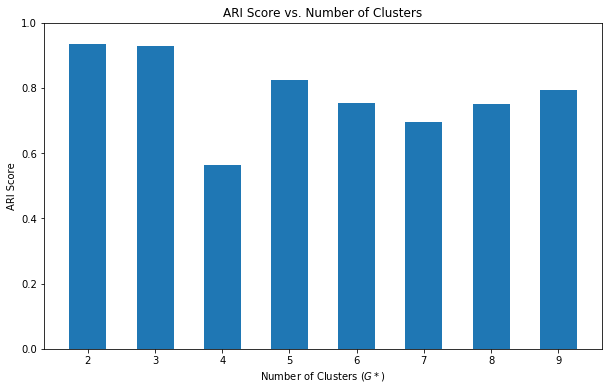

In [31]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [32]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [33]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for \
                                 x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)
        test = pass_attempt_df[[x in weeks_exclude for \
                                x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=3, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=3, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[    ----

In [34]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

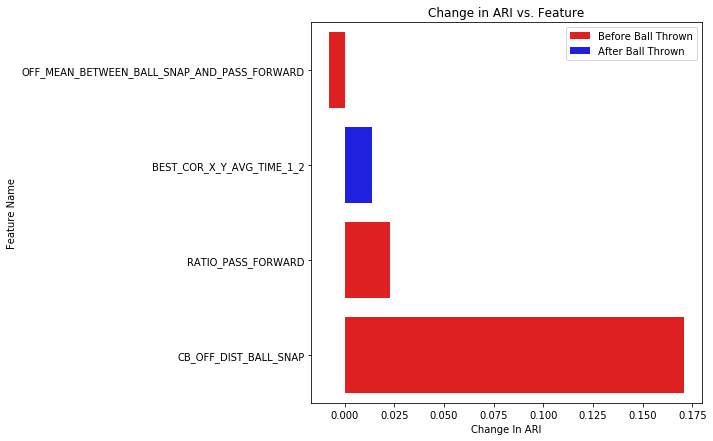

In [35]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [36]:
pass_attempt_df

,week,gameId,playId,nflId,displayName,position,best_cor_x_y_avg_time_1_2,off_mean_between_ball_snap_and_pass_forward,ratio_pass_forward,cb_off_dist_ball_snap
0,1,2018090600,75,79848,Malcolm Jenkins,SS,0.977409,1.154340,1.208153,1.920339
1,1,2018090600,75,2495613,Corey Graham,FS,0.888162,2.222993,0.359715,4.833353
2,1,2018090600,75,2534832,Rodney McLeod,FS,0.987079,17.540821,3.763194,18.243295
3,1,2018090600,146,79848,Malcolm Jenkins,SS,0.913364,3.507079,0.227647,4.016329
4,1,2018090600,146,2534832,Rodney McLeod,FS,0.894573,16.426722,6.542778,17.296751
...,...,...,...,...,...,...,...,...,...,...
34345,17,2018123015,4057,2543830,Tre Boston,FS,0.824539,7.328909,1.035742,7.351258
34346,17,2018123015,4057,2558009,Budda Baker,FS,0.873067,3.047655,0.562888,5.299075
34347,17,2018123015,4104,2495807,Antoine Bethea,FS,0.910673,2.191118,0.337100,10.281449
34348,17,2018123015,4104,2543830,Tre Boston,FS,0.981600,15.569945,2.165334,18.062215


In [37]:
# sampling 45,000 plays to be within CPU limit
X_train = pass_attempt_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_train.shape

(34350, 4)

In [38]:
# all plays to score
X_score = pass_attempt_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(34350, 4)

In [39]:
# train
clf_train = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_train = clf_train.fit(X_train)

In [40]:
get_cluster_means(X_train, f_train)

{'best_cor_x_y_avg_time_1_2': [0.6363915156733361,
  0.9267421185058801,
  0.9628425997698584],
 'cb_off_dist_ball_snap': [12.90437579296576,
  6.800702416043162,
  14.716910052757784],
 'off_mean_between_ball_snap_and_pass_forward': [10.63855172344025,
  4.554920059044799,
  13.437660324201184],
 'ratio_pass_forward': [3.9043673575067137,
  0.47586927152340786,
  5.083052666126601]}

In [41]:
full_probs = [1 - x[1] for x in f_train.predict_proba(X_score)]
full_classes = f_train.predict(X_score)

In [42]:
full_classes2 = [0 if x == 1 else 1 for x in full_classes]

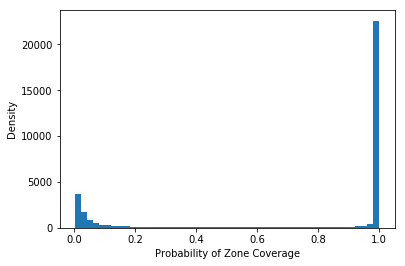

In [43]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [44]:
pass_attempt_df["zone_probability"] = full_probs
pass_attempt_df["zone_flag"] = full_classes2
pass_attempt_df["gmm_class"] = full_classes

In [45]:
pass_attempt_df = pd.concat([pd.DataFrame(f_train.predict_proba(X_score)), pass_attempt_df], axis = 1)

In [46]:
np.mean(pass_attempt_df["zone_flag"])

0.7277729257641922

### Saving Results

In [47]:
pass_attempt_df_final = pass_attempt_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(pass_attempt_df.columns[[str(x).startswith('zone') for x in pass_attempt_df.columns]])]

In [48]:
pass_attempt_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag
0,1,2018090600,75,79848,Malcolm Jenkins,SS,0.702765,1
1,1,2018090600,75,2495613,Corey Graham,FS,0.003977,0
2,1,2018090600,75,2534832,Rodney McLeod,FS,1.000000,1
3,1,2018090600,146,79848,Malcolm Jenkins,SS,0.008440,0
4,1,2018090600,146,2534832,Rodney McLeod,FS,1.000000,1
...,...,...,...,...,...,...,...,...
34345,17,2018123015,4057,2543830,Tre Boston,FS,0.032006,0
34346,17,2018123015,4057,2558009,Budda Baker,FS,0.004110,0
34347,17,2018123015,4104,2495807,Antoine Bethea,FS,0.045031,0
34348,17,2018123015,4104,2543830,Tre Boston,FS,0.999999,1


In [49]:
pass_attempt_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/safeties_pass_attempts_man_zone_classes.csv", 
                             index = False)

In [50]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018090600) & (pass_attempt_df["playId"] == 3279)]

,0,1,2,week,gameId,playId,nflId,displayName,position,best_cor_x_y_avg_time_1_2,off_mean_between_ball_snap_and_pass_forward,ratio_pass_forward,cb_off_dist_ball_snap,zone_probability,zone_flag,gmm_class
134,0.050341,7.981734e-01,1.514857e-01,1,2018090600,3279,79848,Malcolm Jenkins,SS,0.917509,1.694993,1.094996,2.900000,0.201827,0,1
135,0.324817,1.524242e-88,6.751830e-01,1,2018090600,3279,2495613,Corey Graham,FS,0.889913,16.754874,6.935442,18.010511,1.000000,1,2
136,0.998734,1.266402e-03,1.047870e-31,1,2018090600,3279,2534832,Rodney McLeod,FS,0.602469,6.368940,1.164173,12.193802,0.998734,1,0


In [51]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018090906) & (pass_attempt_df["playId"] == 142)][["displayName"] + \
                            list(pass_attempt_df.columns[['ratio' in str(x) for x in pass_attempt_df.columns]])]

,displayName,ratio_pass_forward
847,Chris Conte,5.973377
848,Justin Evans,6.415971


In [52]:
get_cluster_means(X_train, f_train)

{'best_cor_x_y_avg_time_1_2': [0.6363915156733361,
  0.9267421185058801,
  0.9628425997698584],
 'cb_off_dist_ball_snap': [12.90437579296576,
  6.800702416043162,
  14.716910052757784],
 'off_mean_between_ball_snap_and_pass_forward': [10.63855172344025,
  4.554920059044799,
  13.437660324201184],
 'ratio_pass_forward': [3.9043673575067137,
  0.47586927152340786,
  5.083052666126601]}

# Repeating for Sack Plays!

In [7]:
sacks_df = sacks_df[['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
                                  'best_cor_x_y_avg_time_1','cb_off_dist_qb_sack',
                                   'ratio_qb_sack','cb_off_dist_ball_snap']]

In [8]:
sacks_df["cb_off_dist_qb_sack"] = \
np.minimum(np.array(sacks_df["cb_off_dist_qb_sack"]), 30)

sacks_df["ratio_qb_sack"] = \
np.minimum(np.array(sacks_df["ratio_qb_sack"]), 10)

In [9]:
sacks_df.head(10)

,week,gameId,playId,nflId,displayName,position,best_cor_x_y_avg_time_1,cb_off_dist_qb_sack,ratio_qb_sack,cb_off_dist_ball_snap
0,1,2018090600,776,2543850,Ricardo Allen,SS,0.924724,6.598015,0.644028,6.581565
1,1,2018090600,776,2555543,Keanu Neal,FS,0.979696,5.365855,4.228230,18.345596
2,1,2018090600,839,2543850,Ricardo Allen,SS,0.826277,7.749194,1.653318,17.794314
3,1,2018090600,839,2555543,Keanu Neal,FS,0.690475,8.188834,1.018290,5.364709
4,1,2018090600,1568,79848,Malcolm Jenkins,SS,0.964459,1.028591,0.237578,4.433058
5,1,2018090600,1568,2495613,Corey Graham,FS,0.260185,7.362527,7.157874,16.487089
6,1,2018090600,1568,2534832,Rodney McLeod,FS,0.673667,4.329492,4.209147,10.286029
7,1,2018090600,3815,79848,Malcolm Jenkins,SS,0.847724,0.602080,0.060490,9.328049
8,1,2018090600,3815,2495613,Corey Graham,FS,0.920272,5.482490,0.870262,16.738713
9,1,2018090600,3815,2534832,Rodney McLeod,FS,0.652776,3.260567,0.265541,14.810216


In [10]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'best_cor_x_y_avg_time_1', 'cb_off_dist_qb_sack', 'ratio_qb_sack',
       'cb_off_dist_ball_snap'],
      dtype='object')

### Preparing Train/Test Groups

In [20]:
weeks_exclude = [1, 2, 3]
train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

In [21]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [22]:
print(X_train.shape)
print(X_test.shape)

(2047, 4)
(449, 4)


### Fitting GMM Model

In [35]:
# train
clf_train = mixture.GaussianMixture(n_components=4, covariance_type='full')
f_train = clf_train.fit(X_train)

In [36]:
# test
clf_test = mixture.GaussianMixture(n_components=4, covariance_type='full')
f_test = clf_test.fit(X_test)

### Examining Cluster Results

In [37]:
get_cluster_means(X_train, f_train)

{'best_cor_x_y_avg_time_1': [0.7268262203838847,
  0.9595179696923494,
  0.68947752193278,
  0.9609383563396315],
 'cb_off_dist_ball_snap': [10.315125553453008,
  7.99743600289218,
  13.72648249417302,
  14.802049477283752],
 'cb_off_dist_qb_sack': [3.323702305773091,
  1.7723348379610626,
  9.459382191591718,
  9.681663183231821],
 'ratio_qb_sack': [0.5770264511751511,
  0.21518433679230808,
  5.201897900467153,
  4.763422399724521]}

### Computing Rand Index

In [38]:
from sklearn.metrics import adjusted_rand_score

In [39]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [40]:
adjusted_rand_score(y_train, y_test)

0.7821353256259052

### Iterating Through To Get Cross-Validation Scores

In [21]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [67]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
        test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.8788048068159814
0.32575119649918016
0.7305705262508221
0.38298278104116307
0.5847041710023886
0.4599898112868299
0.4843246108193011
0.4474218280347861


### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

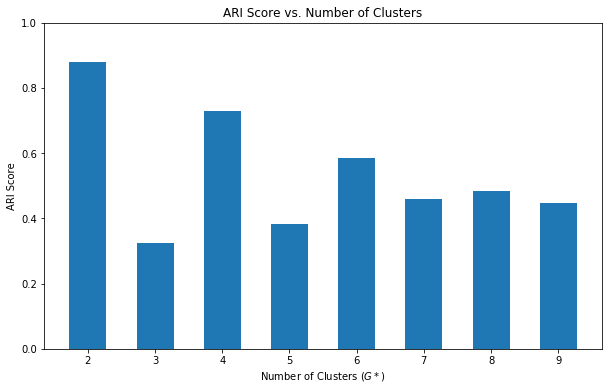

In [68]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [69]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [70]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for \
                                 x in list(sacks_df["week"])]].drop([feature], axis = 1)
        test = sacks_df[[x in weeks_exclude for \
                                x in list(sacks_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=4, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=4, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[    ----

In [71]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

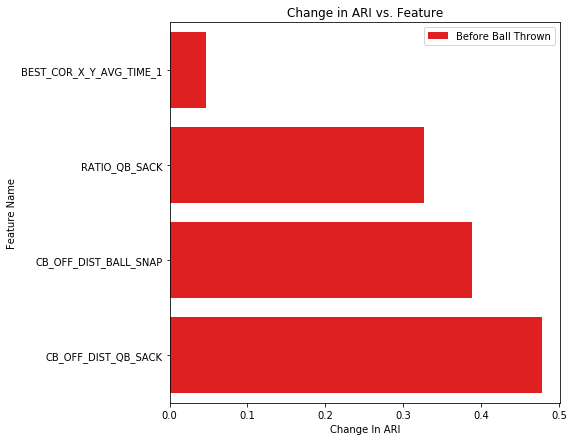

In [72]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [41]:
sacks_df

,week,gameId,playId,nflId,displayName,position,best_cor_x_y_avg_time_1,cb_off_dist_qb_sack,ratio_qb_sack,cb_off_dist_ball_snap
0,1,2018090600,776,2543850,Ricardo Allen,SS,0.924724,6.598015,0.644028,6.581565
1,1,2018090600,776,2555543,Keanu Neal,FS,0.979696,5.365855,4.228230,18.345596
2,1,2018090600,839,2543850,Ricardo Allen,SS,0.826277,7.749194,1.653318,17.794314
3,1,2018090600,839,2555543,Keanu Neal,FS,0.690475,8.188834,1.018290,5.364709
4,1,2018090600,1568,79848,Malcolm Jenkins,SS,0.964459,1.028591,0.237578,4.433058
...,...,...,...,...,...,...,...,...,...,...
2491,17,2018123015,3734,2495807,Antoine Bethea,FS,0.987300,4.121019,0.498126,8.829371
2492,17,2018123015,3734,2543830,Tre Boston,FS,0.816832,14.767383,10.000000,7.037386
2493,17,2018123015,3734,2558009,Budda Baker,FS,0.938292,8.273041,2.007523,2.703516
2494,17,2018123015,3932,2539243,Bradley McDougald,SS,0.960433,0.908020,0.064905,16.004453


In [42]:
# all plays to score
X_score = sacks_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(2496, 4)

In [43]:
get_cluster_means(X_train, f_train)

{'best_cor_x_y_avg_time_1': [0.7268262203838847,
  0.9595179696923494,
  0.68947752193278,
  0.9609383563396315],
 'cb_off_dist_ball_snap': [10.315125553453008,
  7.99743600289218,
  13.72648249417302,
  14.802049477283752],
 'cb_off_dist_qb_sack': [3.323702305773091,
  1.7723348379610626,
  9.459382191591718,
  9.681663183231821],
 'ratio_qb_sack': [0.5770264511751511,
  0.21518433679230808,
  5.201897900467153,
  4.763422399724521]}

In [44]:
full_probs = [1 - x[1] for x in f_train.predict_proba(X_score)]
full_classes = f_train.predict(X_score)

In [45]:
full_classes2 = [0 if x == 1 else 1 for x in full_classes]

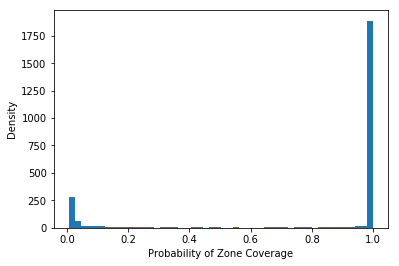

In [46]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [47]:
sacks_df["zone_probability"] = full_probs
sacks_df["zone_flag"] = full_classes2
sacks_df["gmm_class"] = full_classes

In [48]:
sacks_df = pd.concat([pd.DataFrame(f_train.predict_proba(X_score)), sacks_df], axis = 1)

In [49]:
np.mean(sacks_df["zone_flag"])

0.8004807692307693

### Saving Results

In [50]:
sacks_df_final = sacks_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(sacks_df.columns[[str(x).startswith('zone') for x in sacks_df.columns]])]

In [51]:
sacks_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag
0,1,2018090600,776,2543850,Ricardo Allen,SS,0.999361,1
1,1,2018090600,776,2555543,Keanu Neal,FS,1.000000,1
2,1,2018090600,839,2543850,Ricardo Allen,SS,1.000000,1
3,1,2018090600,839,2555543,Keanu Neal,FS,1.000000,1
4,1,2018090600,1568,79848,Malcolm Jenkins,SS,0.013100,0
...,...,...,...,...,...,...,...,...
2491,17,2018123015,3734,2495807,Antoine Bethea,FS,0.252720,0
2492,17,2018123015,3734,2543830,Tre Boston,FS,1.000000,1
2493,17,2018123015,3734,2558009,Budda Baker,FS,1.000000,1
2494,17,2018123015,3932,2539243,Bradley McDougald,SS,0.031126,0


In [55]:
sacks_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/safeties_sacks_man_zone_classes.csv", 
                      index = False)

In [52]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)]

,0,1,2,3,week,gameId,playId,nflId,displayName,position,best_cor_x_y_avg_time_1,cb_off_dist_qb_sack,ratio_qb_sack,cb_off_dist_ball_snap,zone_probability,zone_flag,gmm_class


In [54]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)][["displayName"] + \
                            list(sacks_df.columns[['cor_s' in str(x) for x in sacks_df.columns]])]

,displayName
